In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/prepared/financial_texts_keywords.csv")

In [3]:
data

,Unnamed: 0,Unnamed: 0.1,text
0,0,0,video “i was in my office i was minding my own...
1,1,1,the price of lumber lbf is down since hitting ...
2,2,2,who says the american dream is dead
3,3,3,barry silbert is extremely optimistic on bitco...
4,4,4,how satellites avoid attacks and space junk wh...
...,...,...,...
33281,4841,4841,london marketwatch share prices ended lower in...
33282,4842,4842,rinkuskiai s beer sales fell by per cent to mi...
33283,4843,4843,operating profit fell to eur mn from eur mn in...
33284,4844,4844,net sales of the paper segment decreased to eu...


In [4]:
keywords = [('bitco', 0.4436),
 ('lifechanging', 0.2185),
 ('woodmont', 0.1872),
 ('putinsmypapiefxequifax', 0.2023),
 ('analysts', 0.3273),
 ('trumps', 0.0538),
 ('liechtenstein', 0.1586),
 ('sihvonen', 0.3196),
 ('felled', 0.1333),
 ('photonium', 0.0429),
 ('gtmi', 0.1954),
 ('jerry', 0.2843),
 ('naacp', 0.169),
 ('nasdaqdltr', 0.1714),
 ('rickdecard', 0.2128),
 ('breakfast', 0.0108),
 ('bios', 0.0964),
 ('dgld', 0.2283),
 ('sellinga', 0.336),
 ('pledged', 0.2649),
 ('exists', 0.2827),
 ('crushes', 0.0765),
 ('km', 0.0499),
 ('brpau', 0.2367),
 ('hotpagenews', 0.249),
 ('expiring', -0.0007),
 ('gratuitous', 0.0642),
 ('carolinefevans', 0.1872),
 ('whotradeshlthilton', 0.3374),
 ('inflows', 0.1075),
 ('foxconn', 0.2512),
 ('arent', 0.2503),
 ('drillers', 0.0503),
 ('epicmove', 0.3357),
 ('vergecurrency', 0.3083),
 ('icloud', 0.0192),
 ('sterling', 0.2724),
 ('bbbd', 0.1892),
 ('recalled', 0.1338),
 ('bankrupt', 0.2743)]

In [5]:
keywords = [k[0] for k in keywords]

In [7]:
total = data.shape[0]
contains = 0

for text in data['text']:
    for keyword in keywords:
        if keyword in text:
            contains += 1
            break

print(contains, contains/total)

2623 0.07880189869614854


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
step = [200, 400, 600, 800, 1000, 1200, 1400]
training_loss = [0.644400, 0.541900, 0.525000, 0.466100, 0.436000, 0.441500, 0.406700]
validation_loss = [0.552330, 0.492410, 0.493543, 0.509786, 0.516807, 0.470589, 0.523799]
accuracy = [0.724176, 0.766383, 0.785265, 0.770455, 0.799704, 0.793040, 0.776009]

In [13]:
res = pd.DataFrame(data=np.array([step, training_loss, validation_loss, accuracy]).T, 
                   columns=['step', 'training_loss', 'validation_loss', 'accuracy'])
res

,step,training_loss,validation_loss,accuracy
0,200.0,0.6444,0.552330,0.724176
1,400.0,0.5419,0.492410,0.766383
2,600.0,0.5250,0.493543,0.785265
3,800.0,0.4661,0.509786,0.770455
4,1000.0,0.4360,0.516807,0.799704
5,1200.0,0.4415,0.470589,0.793040
6,1400.0,0.4067,0.523799,0.776009


In [23]:
sns.set_style("whitegrid")
sns.set_context("notebook")

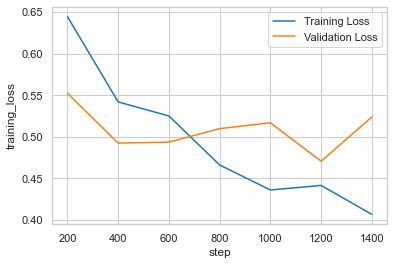

In [24]:
sns.lineplot(data=res, x='step', y='training_loss', label='Training Loss')
sns.lineplot(data=res, x='step', y='validation_loss', label='Validation Loss')
plt.show()

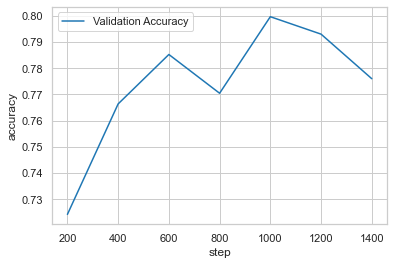

In [26]:
sns.lineplot(data=res, x='step', y='accuracy', label='Validation Accuracy')
plt.show()

In [29]:
import re

In [42]:
s = """Step	Training Loss	Validation Loss	Accuracy
700	0.165900	0.087213	0.981231
1400	0.089600	0.057703	0.987844
2100	0.059700	0.050412	0.990372
2800	0.059500	0.053524	0.990664
3500	0.049600	0.041653	0.991150
4200	0.043900	0.051918	0.989497
4900	0.052100	0.035581	0.991442
5600	0.027700	0.043681	0.992317
6300	0.013600	0.048026	0.991928
7000	0.011300	0.046853	0.992706
7700	0.012000	0.037074	0.993290
8400	0.019900	0.040909	0.992026
9100	0.006900	0.047472	0.992415
9800	0.007700	0.043290	0.993290"""

s = re.split('\t|\n',s)

step = [int(x) for x in s[4::4]]
training_loss = [float(x) for x in s[5::4]]
validation_loss = [float(x) for x in s[6::4]]
accuracy = [float(x) for x in s[7::4]]

In [43]:
res = pd.DataFrame(data=np.array([step, training_loss, validation_loss, accuracy]).T, 
                   columns=['step', 'training_loss', 'validation_loss', 'accuracy'])
res

,step,training_loss,validation_loss,accuracy
0,700.0,0.1659,0.087213,0.981231
1,1400.0,0.0896,0.057703,0.987844
2,2100.0,0.0597,0.050412,0.990372
3,2800.0,0.0595,0.053524,0.990664
4,3500.0,0.0496,0.041653,0.991150
5,4200.0,0.0439,0.051918,0.989497
6,4900.0,0.0521,0.035581,0.991442
7,5600.0,0.0277,0.043681,0.992317
8,6300.0,0.0136,0.048026,0.991928
9,7000.0,0.0113,0.046853,0.992706


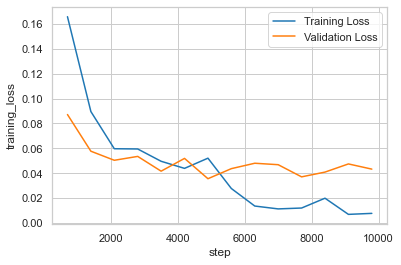

In [44]:
sns.lineplot(data=res, x='step', y='training_loss', label='Training Loss')
sns.lineplot(data=res, x='step', y='validation_loss', label='Validation Loss')
plt.show()

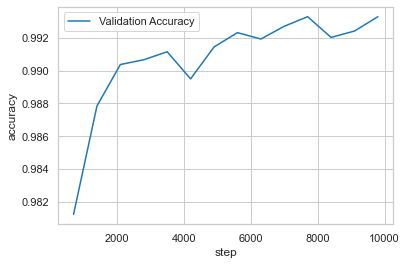

In [45]:
sns.lineplot(data=res, x='step', y='accuracy', label='Validation Accuracy')
plt.show()

In [48]:
test = pd.read_csv('../data/prepared/dataset_for_testing_v2.csv')

In [50]:
test.iloc[3068]['text']

'on wednesday he announced that the government would propose granting a licence for two reactors one to be built by fennovoima and the other by tvo '